In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# Setup Pytrend Library and Keyword Define

In [3]:
pytrends=TrendReq(hl="en-US",tz=360)
keyword="cloud computing"

# Data Request

In [4]:
pytrends.build_payload([keyword],cat=0,timeframe="today 12-m",geo="",gprop="")

# Country Wise Request

In [8]:
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword,ascending=False).head(15)

C:\Users\anike\AppData\Local\Temp\ipykernel_18944\1257606984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")


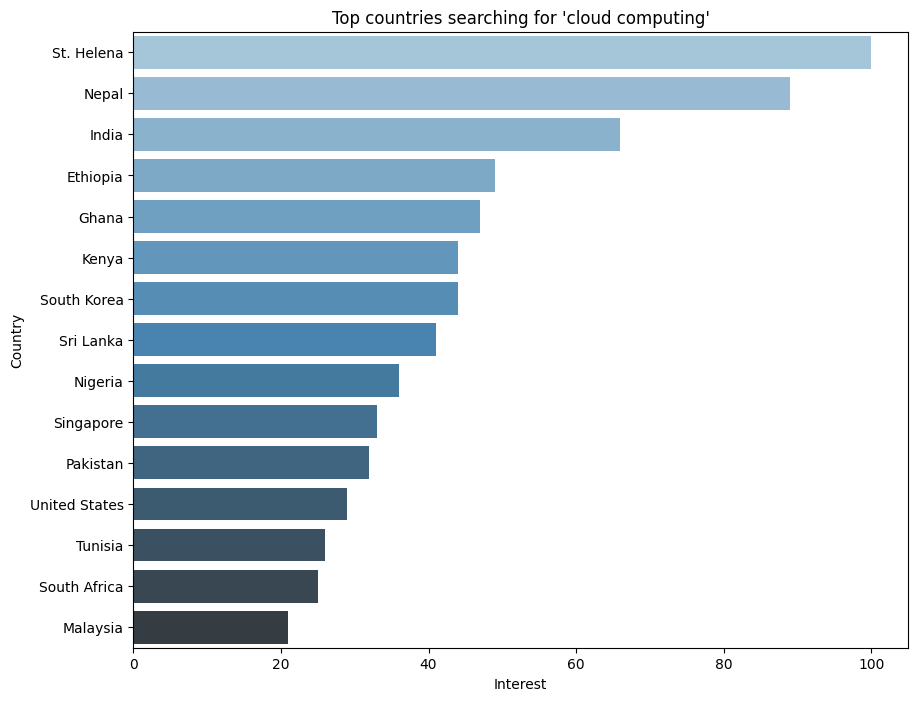

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x=region_data[keyword],y=region_data.index,palette="Blues_d")
plt.title(f"Top countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# World Map

C:\Users\anike\AppData\Local\Temp\ipykernel_18944\26116021.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



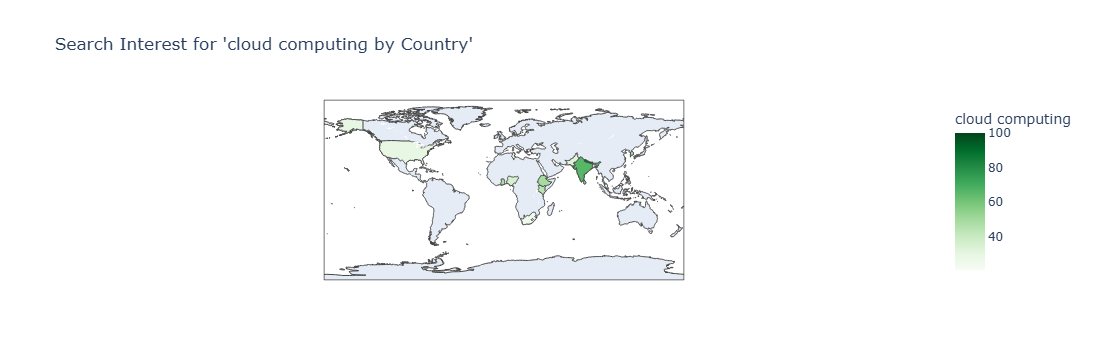

In [12]:
region_data=region_data.reset_index()
fig=px.choropleth(region_data,
                  locations="geoName",
                  locationmode="country names",
                  color=keyword,
                  title=f"Search Interest for '{keyword} by Country'",
                  color_continuous_scale="Greens")
fig.show()

# Time Wise Interest

In [13]:
time_df=pytrends.interest_over_time()

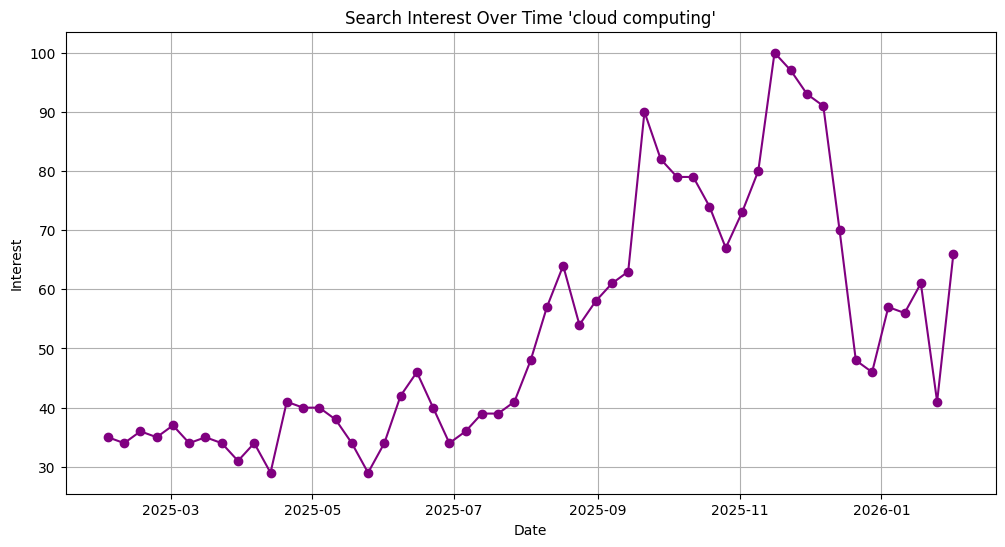

In [16]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index,time_df[keyword],marker="o",color="purple")
plt.title(f"Search Interest Over Time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple Keyword Compare

In [18]:
kw_list=["data science","data engineer","data analyst"]
pytrends.build_payload(kw_list,cat=0,timeframe="today 12-m",geo="",gprop="")

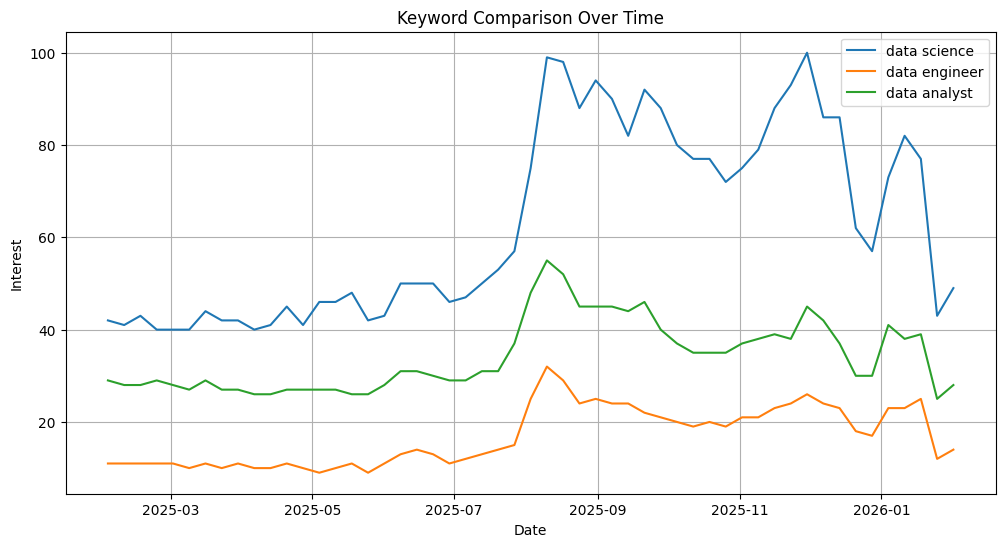

In [28]:
compare_df=pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label=kw)
plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.show()